# 1. Importing Required Packages and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

# 2. Importing and Reading Datasets

In [4]:
df = pd.read_csv('tested.csv')

In [5]:
copy = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. EDA

In [8]:
df.drop(columns=['Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S


In [10]:
df.drop(columns=['Ticket'], axis = 1, inplace = True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [12]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,34.5,0,0,7.8292,Q,1
1,1,3,female,47.0,1,0,7.0000,S,2
2,0,2,male,62.0,0,0,9.6875,Q,1
3,0,3,male,27.0,0,0,8.6625,S,1
4,1,3,female,22.0,1,1,12.2875,S,3


In [14]:
df.drop(columns=['SibSp', 'Parch'], axis = 1, inplace = True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,34.5,7.8292,Q,1
1,1,3,female,47.0,7.0000,S,2
2,0,2,male,62.0,9.6875,Q,1
3,0,3,male,27.0,8.6625,S,1
4,1,3,female,22.0,12.2875,S,3


In [15]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
Family       0
dtype: int64

In [16]:
copy.duplicated().sum()

0

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Family      0
dtype: int64

In [19]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [21]:
tab = ['Pclass', 'Sex', 'Embarked', 'Family']
for  val in tab:
    print(df[val].value_counts())
    print('*' * 50)

3    218
1    107
2     93
Name: Pclass, dtype: int64
**************************************************
male      266
female    152
Name: Sex, dtype: int64
**************************************************
S    270
C    102
Q     46
Name: Embarked, dtype: int64
**************************************************
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64
**************************************************


# 4. Some Visuals

<Axes: xlabel='Sex', ylabel='Age'>

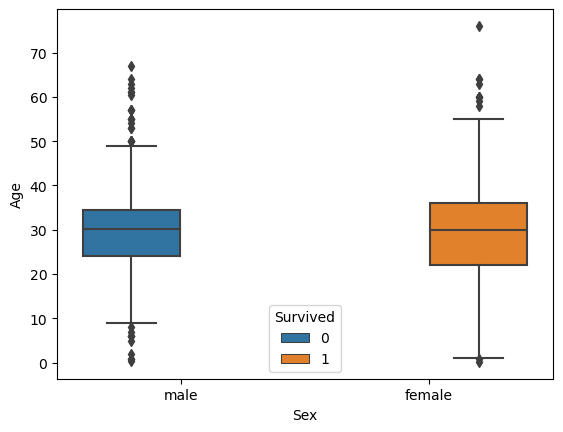

In [22]:
sns.boxplot(data = df, x = 'Sex', y = 'Age', hue='Survived' )

<Axes: xlabel='Embarked', ylabel='count'>

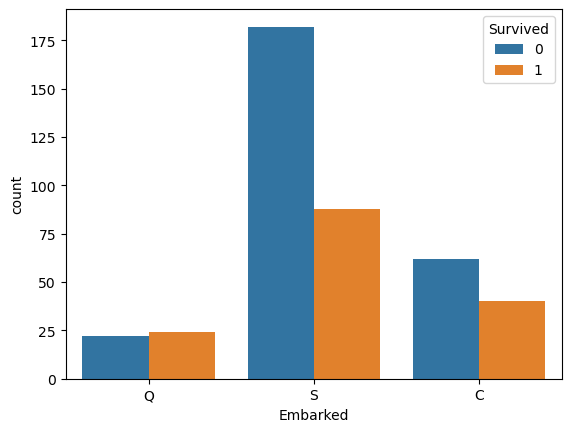

In [23]:
sns.countplot(x = df['Embarked'], hue=df['Survived'])

<Axes: ylabel='Survived'>

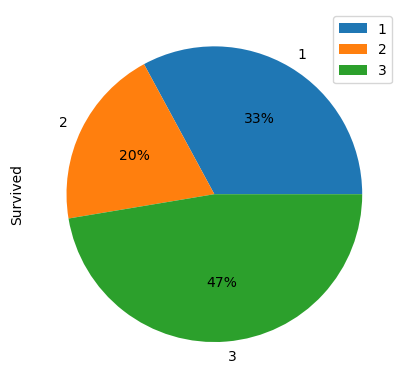

In [24]:
df.groupby('Pclass').sum().plot(kind = 'pie', y = 'Survived', autopct='%1.0f%%')

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Embarked  418 non-null    object 
 6   Family    418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [27]:
df.drop(columns=['Fare'], axis = 1, inplace = True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,34.5,Q,1
1,1,3,female,47.0,S,2
2,0,2,male,62.0,Q,1
3,0,3,male,27.0,S,1
4,1,3,female,22.0,S,3


# 5. Feature Engineering

In [29]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [30]:
x

,Pclass,Sex,Age,Embarked,Family
0,3,male,34.50000,Q,1
1,3,female,47.00000,S,2
2,2,male,62.00000,Q,1
3,3,male,27.00000,S,1
4,3,female,22.00000,S,3
...,...,...,...,...,...
413,3,male,30.27259,S,1
414,1,female,39.00000,C,1
415,3,male,38.50000,S,1
416,3,male,30.27259,S,1


In [31]:
ct = ColumnTransformer(transformers=[
    ('tr1', OneHotEncoder(sparse=False, drop='first'), ['Sex', 'Embarked']),
    ('tr2', OrdinalEncoder(categories=[['1', '2', '3']]), ['Pclass'])
], remainder='passthrough')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [33]:
x_train_ct = ct.fit_transform(x_train)

In [34]:
x_train

,Pclass,Sex,Age,Embarked,Family
173,3,male,30.27259,C,1
342,3,male,30.27259,S,11
131,1,male,53.00000,C,1
157,3,female,23.00000,S,1
170,3,male,30.27259,S,1
...,...,...,...,...,...
378,1,male,55.00000,S,1
397,1,female,48.00000,C,3
303,3,male,24.00000,S,1
246,2,female,22.00000,S,1


In [35]:
x_train_ct

array([[ 1.        ,  0.        ,  0.        ,  2.        , 30.27259036,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 30.27259036,
        11.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        , 53.        ,
         1.        ],
       ...,
       [ 1.        ,  0.        ,  1.        ,  2.        , 24.        ,
         1.        ],
       [ 0.        ,  0.        ,  1.        ,  1.        , 22.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 30.27259036,
         1.        ]])

In [36]:
type(x_train_ct)

numpy.ndarray

In [37]:
x_test_ct = ct.transform(x_test)

In [38]:
x_test

,Pclass,Sex,Age,Embarked,Family
197,3,female,18.00000,S,1
309,3,female,45.00000,S,2
180,2,male,30.00000,S,1
53,1,female,28.00000,S,6
126,3,male,22.00000,S,1
...,...,...,...,...,...
389,3,male,6.00000,S,5
200,3,female,30.27259,Q,1
281,3,male,0.75000,S,3
366,3,male,30.27259,C,2


In [39]:
x_test_ct

array([[ 0.        ,  0.        ,  1.        ,  2.        , 18.        ,
         1.        ],
       [ 0.        ,  0.        ,  1.        ,  2.        , 45.        ,
         2.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        , 30.        ,
         1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        , 28.        ,
         6.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 22.        ,
         1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 26.        ,
         2.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 23.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 27.        ,
         1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 45.        ,
         2.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        , 28.        ,
         1.        ],
       [ 1.        ,  0.        ,  0.        ,  2.

In [40]:
print(x_train_ct.shape)
print(x_test_ct.shape)

(313, 6)
(105, 6)


In [41]:
mm = MinMaxScaler()

In [42]:
x_train_ct_mm = mm.fit_transform(x_train_ct)

In [43]:
x_train_ct_mm

array([[1.        , 0.        , 0.        , 1.        , 0.39569962,
        0.        ],
       [1.        , 0.        , 1.        , 1.        , 0.39569962,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.69604863,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , 1.        , 0.3128056 ,
        0.        ],
       [0.        , 0.        , 1.        , 0.5       , 0.28637505,
        0.        ],
       [1.        , 0.        , 1.        , 1.        , 0.39569962,
        0.        ]])

In [44]:
x_test_ct_mm = mm.transform(x_test_ct)

In [45]:
x_test_ct_mm

array([[ 0.        ,  0.        ,  1.        ,  1.        ,  0.23351394,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  0.59032642,
         0.1       ],
       [ 1.        ,  0.        ,  1.        ,  0.5       ,  0.39209726,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.36566671,
         0.5       ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.28637505,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.33923616,
         0.1       ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.29959033,
         0.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.35245143,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.59032642,
         0.1       ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.36566671,
         0.        ],
       [ 1.        ,  0.        ,  0.        ,  1.

#  Modelling

### A. Logistic Regression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_train_ct_mm, y_train)

LogisticRegression()

In [48]:
pred_lr = lr.predict(x_test_ct_mm)

In [49]:
score_lr = accuracy_score(y_test, pred_lr)

In [50]:
score_lr

1.0

In [51]:
score_lr_new = f1_score(y_test, pred_lr)

In [52]:
score_lr_new

1.0

In [53]:
cm_lr = confusion_matrix(y_test, pred_lr)

<Axes: >

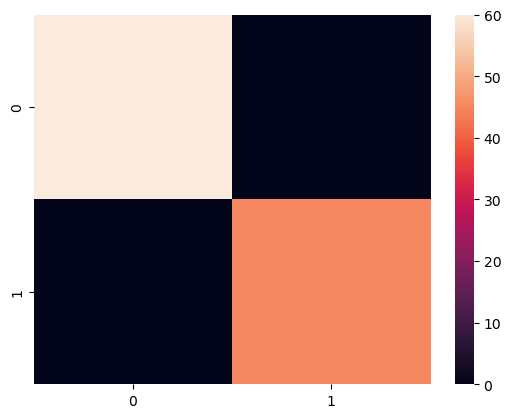

In [54]:
sns.heatmap(cm_lr)

### B. DecisionTree

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(x_train_ct_mm, y_train)

DecisionTreeClassifier()

In [57]:
pred_dt = dt.predict(x_test_ct_mm)

In [58]:
score_dt = accuracy_score(y_test, pred_dt)

In [59]:
score_dt

1.0

In [60]:
cm_dtc = confusion_matrix(y_test, pred_dt)

<Axes: >

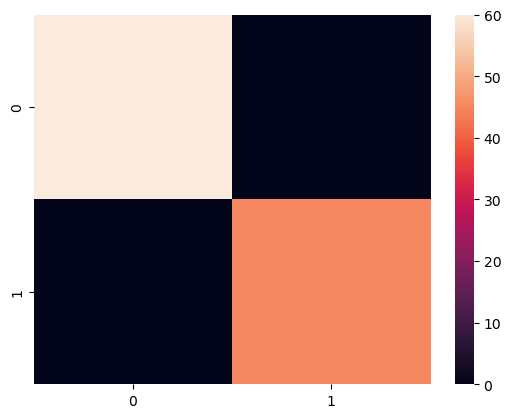

In [61]:
sns.heatmap(cm_dtc)

### C. Random Forest Classifier

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(x_train_ct_mm, y_train)

RandomForestClassifier()

In [64]:
pred_rfc = rfc.predict(x_test_ct_mm)

In [65]:
score_rfc = accuracy_score(y_test, pred_rfc)

In [66]:
score_rfc

1.0

In [67]:
score_rfc_new = precision_score(y_test, pred_rfc)

In [68]:
score_rfc_new

1.0

In [69]:
cm_rfc = confusion_matrix(y_test, pred_rfc)

<Axes: >

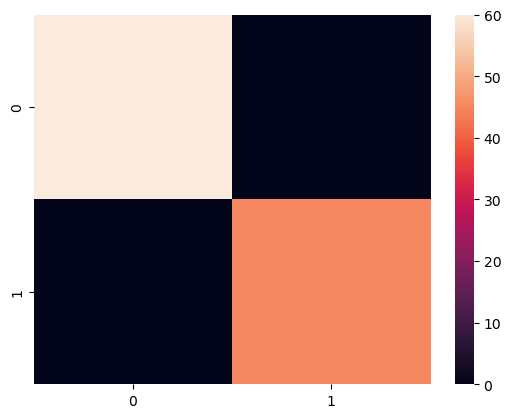

In [70]:
sns.heatmap(cm_rfc)

### D. Perceptron

In [71]:
perc = Perceptron()

In [72]:
perc.fit(x_train_ct_mm, y_train)

Perceptron()

In [73]:
pred_per = perc.predict(x_test_ct_mm)

In [74]:
score_perc = accuracy_score(y_test, pred_per)

In [75]:
score_perc

1.0

In [76]:
cm_perc = confusion_matrix(y_test, pred_per)

<Axes: >

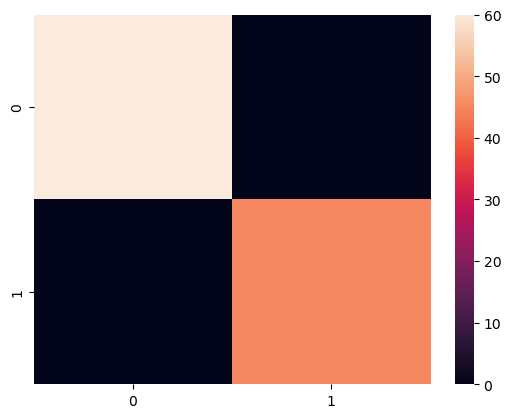

In [77]:
sns.heatmap(cm_perc)

### E. KNN

In [78]:
kn = KNeighborsClassifier()

In [79]:
kn.fit(x_train_ct_mm, y_train)

KNeighborsClassifier()

In [80]:
pred_kn = kn.predict(x_test_ct_mm)

In [81]:
score_kn = accuracy_score(y_test, pred_kn)

In [82]:
score_kn

1.0

In [83]:
cm_kn = confusion_matrix(y_test, pred_kn)

<Axes: >

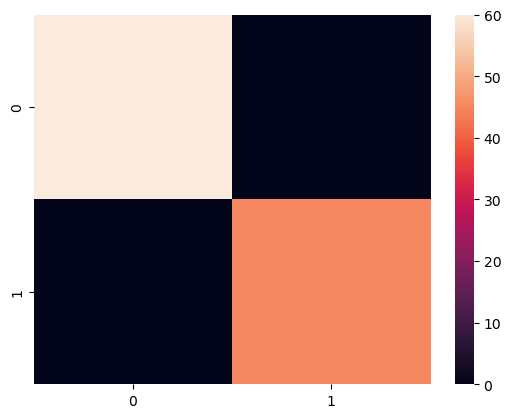

In [84]:
sns.heatmap(cm_kn)

# Thanking you all